## Display evolution of live streams

This notebook aims to provide visualisations of the streams with a VTuber tag.

In [1]:
import pandas as pd

# df = pd.read_csv('../Data/twitch_streams_vtuber_tagIds.csv') # Old Twitch API
df = pd.read_csv('../Data/twitch_streams_vtuber_tagIds_tags.csv') # New twitch API

In order to do some arithmetic operations with timestamps, we first transform `string` timestamps into `datetime` objects of pandas.

In [2]:
date_format = '%Y-%m-%dT%H:%M:%SZ'

def to_dateTime(row):
    row['started_at'] = pd.to_datetime(row['started_at'], format=date_format)
    row['_custom_ended_at'] = pd.to_datetime(row['_custom_ended_at'], format=date_format)
    return row


df = df.apply(to_dateTime, axis='columns')

We define the `time_step` with which we want to see our data. And we can optionally restrict the data to a specific time interval.

In [3]:
#df = df[(df['started_at'] > pd.to_datetime('2022-11-14 00:00:00')) & (df['started_at'] < pd.to_datetime('2022-11-15 00:00:00'))]

time_step = pd.Timedelta(minutes=5)
date_range = pd.date_range(start=df.iloc[0]['started_at'], end=df['_custom_ended_at'].max() + time_step, freq=time_step)

Now we count the number of live streams over time.

In [4]:
import numpy as np

streams_nb = np.zeros(len(date_range))

for index, row in df.iterrows():
    if not pd.isnull(row['_custom_ended_at']):
        imin = int(np.floor((row['started_at'] - date_range[0]) / time_step))
        imax = int(np.ceil((row['_custom_ended_at'] - date_range[0]) / time_step))
        
        streams_nb[imin:imax] += 1

/tmp/ipykernel_2344/2930463808.py:5: FutureWarning: Inferring datetime64[ns, UTC] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns, UTC])
  for index, row in df.iterrows():


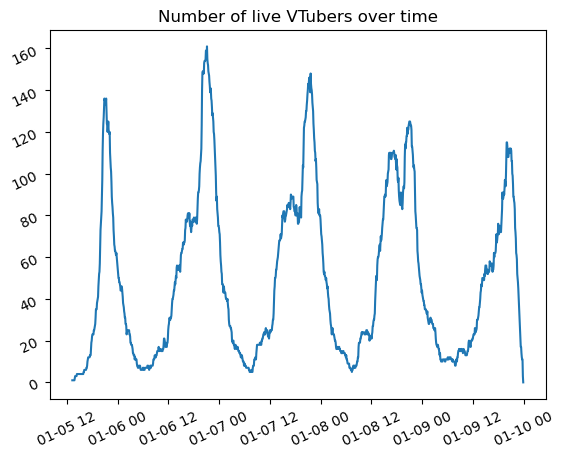

In [5]:
#%matplotlib widget

import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(x=date_range, y=streams_nb, ).tick_params(rotation=25)
plt.title('Number of live VTubers over time');

## Display evolution of VTuber discovery

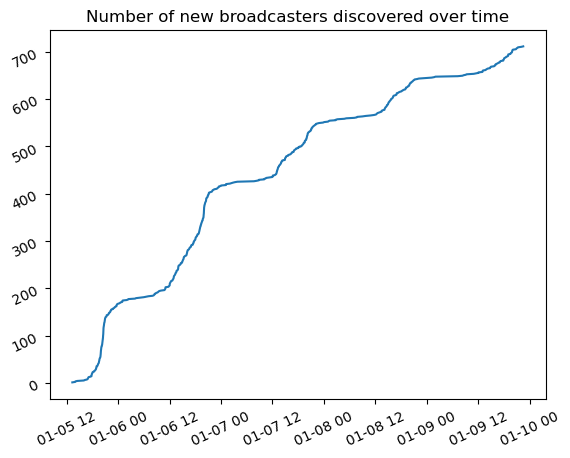

In [6]:
#%matplotlib widget

df_vtuber_sorted = df.groupby('user_id').apply(lambda df_ : df_['started_at'].min())

df_vtuber_sorted = df_vtuber_sorted.sort_values()

vtuber_discovery_nb = range(1, len(df_vtuber_sorted) + 1)

sns.lineplot(x=df_vtuber_sorted, y=vtuber_discovery_nb, ).tick_params(rotation=25)
plt.title('Number of new broadcasters discovered over time');


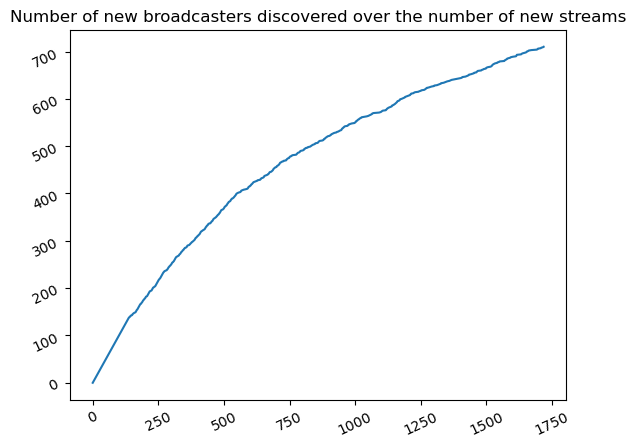

In [7]:
#%matplotlib widget

def first_with_index(df_):
    return df_.sort_values('started_at').iloc[0].loc[['index','started_at']]

df_vtuber_sorted_2 = df.reset_index().groupby('user_id').apply(first_with_index)
df_vtuber_sorted_2 = df_vtuber_sorted_2.sort_values('started_at')

sns.lineplot(y=range(len(df_vtuber_sorted_2)), x=df_vtuber_sorted_2['index']).tick_params(rotation=25)
plt.xlabel('')
plt.title('Number of new broadcasters discovered over the number of new streams');
